In [80]:
dataset_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-44/detailed-bidirectional-flow-labels/capture20110812.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-45/detailed-bidirectional-flow-labels/capture20110815.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-46/detailed-bidirectional-flow-labels/capture20110815-2.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-47/detailed-bidirectional-flow-labels/capture20110816.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-48/detailed-bidirectional-flow-labels/capture20110816-2.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-49/detailed-bidirectional-flow-labels/capture20110816-3.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-54/detailed-bidirectional-flow-labels/capture20110815-3.binetflow"]

In [81]:
import pandas as pd
from tqdm import tqdm

final_df = pd.DataFrame()
for url in tqdm(dataset_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_data.csv", index=False)
del final_df

100%|██████████| 13/13 [06:41<00:00, 30.87s/it]


In [82]:
!pip install scikit-plot scipy==1.11.4

In [ ]:
import os
os.kill(os.getpid(), 9)

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/ctu_13_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [80]:
# df['SrcAddr'] = np.random.permutation(df['SrcAddr'])
# df['Sport'] = np.random.permutation(df['Sport'])

# Function to randomize IP address
# def randomize_ip():
#     return f"{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}"

# # Function to randomize port
# def randomize_port():
#     return np.random.randint(1024, 65536)  # Registered and dynamic ports

# # Apply randomization
# data['SrcAddr'] = data['SrcAddr'].apply(lambda x: randomize_ip())
# data['Sport'] = data['Sport'].apply(lambda x: randomize_port())

In [81]:
data.shape

(19976700, 15)

In [82]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [83]:
def convertlabel(sample_data):
    if "botnet" in sample_data.lower():
        return 1
    else:
        return 0

data['Label'] = data['Label'].apply(lambda x:convertlabel(x))

In [84]:
data['Label'].value_counts()

,count
Label,
0,19532001
1,444699


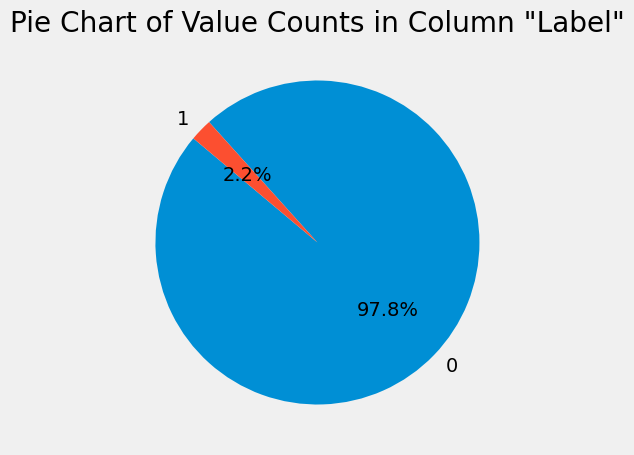

In [85]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [86]:
th = 1000
data1 = data[data['Label'] == 0].head(th)
data2 = data[data['Label'] == 1].head(th)

data = pd.concat([data1,data2])
data.shape

(2000, 15)

In [87]:
data['Label'].value_counts()

,count
Label,
0,1000
1,1000


In [88]:
data.to_csv('/content/ctu_13_sample_data.csv', index=False)

In [89]:
data = pd.read_csv('/content/ctu_13_sample_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,0


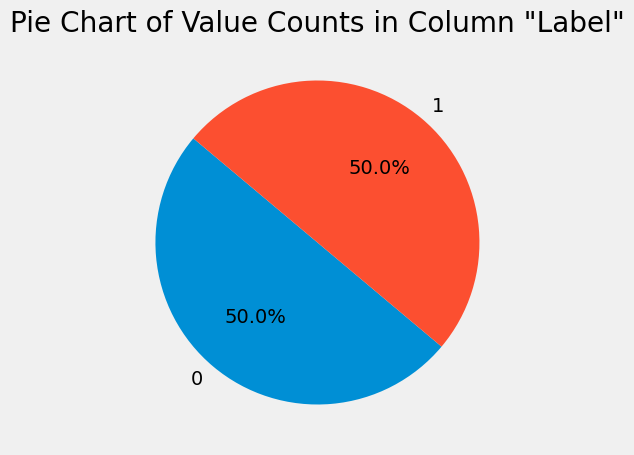

In [90]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [91]:
data.dtypes

,0
StartTime,object
Dur,float64
Proto,object
SrcAddr,object
Sport,object
Dir,object
DstAddr,object
Dport,object
State,object
sTos,float64


In [92]:
data.isna().mean() * 100

,0
StartTime,0.00
Dur,0.00
Proto,0.00
SrcAddr,0.00
Sport,0.20
Dir,0.00
DstAddr,0.00
Dport,0.20
State,0.00
sTos,0.15


In [93]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,0


In [94]:
data = data[pd.to_numeric(data['Sport'], errors='coerce').notnull()]
data['Sport'] = pd.to_numeric(data['Sport'])
data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [95]:
data = data[pd.to_numeric(data['Dport'], errors='coerce').notnull()]
data['Dport'] = pd.to_numeric(data['Dport'])
data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [96]:
data = data.fillna(value=0.0)
data.isna().mean() * 100

,0
StartTime,0.0
Dur,0.0
Proto,0.0
SrcAddr,0.0
Sport,0.0
Dir,0.0
DstAddr,0.0
Dport,0.0
State,0.0
sTos,0.0


In [97]:
data.describe()

,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,1978.000000,1978.000000,1978.000000,1978.0,1978.0,1978.000000,1.978000e+03,1.978000e+03,1978.000000
mean,660.744736,16429.134479,7829.098584,0.0,0.0,279.446411,2.001482e+05,1.838824e+05,0.505561
std,1253.268513,21031.950043,14083.625647,0.0,0.0,4424.790783,3.928018e+06,3.826686e+06,0.500096
min,0.000000,1.000000,20.000000,0.0,0.0,1.000000,6.000000e+01,6.000000e+01,0.000000
25%,0.301484,1538.250000,53.000000,0.0,0.0,2.000000,1.860000e+02,1.240000e+02,0.000000
50%,9.012479,2035.500000,85.000000,0.0,0.0,3.000000,2.930000e+02,1.860000e+02,1.000000
75%,189.202762,33912.000000,13363.000000,0.0,0.0,11.000000,1.596000e+03,8.202500e+02,1.000000
max,3599.995117,65282.000000,65520.000000,0.0,0.0,162760.000000,1.371365e+08,1.328164e+08,1.000000


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StartTime  1978 non-null   object 
 1   Dur        1978 non-null   float64
 2   Proto      1978 non-null   object 
 3   SrcAddr    1978 non-null   object 
 4   Sport      1978 non-null   int64  
 5   Dir        1978 non-null   object 
 6   DstAddr    1978 non-null   object 
 7   Dport      1978 non-null   int64  
 8   State      1978 non-null   object 
 9   sTos       1978 non-null   float64
 10  dTos       1978 non-null   float64
 11  TotPkts    1978 non-null   int64  
 12  TotBytes   1978 non-null   int64  
 13  SrcBytes   1978 non-null   int64  
 14  Label      1978 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 247.2+ KB


In [99]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,0


In [100]:
data['Proto'].value_counts()

,count
Proto,
tcp,1182
udp,790
rtp,5
rtcp,1


In [101]:
data['Dir'].value_counts()

,count
Dir,
->,1020
<->,730
<?>,208
?>,20


In [102]:
data['State'].value_counts()

,count
State,
CON,730
S_,619
FSPA_FSPA,115
PA_PA,89
INT,66
...,...
RA_A,1
FA_R,1
FSPA_SA,1


In [103]:
data.isna().sum().sum()

0

In [104]:
data.duplicated().sum()

0

In [105]:
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['Hour'] = data['StartTime'].dt.hour
data['Minute'] = data['StartTime'].dt.minute
data['Second'] = data['StartTime'].dt.second
data['DayOfWeek'] = data['StartTime'].dt.dayofweek
data['Day'] = data['StartTime'].dt.day

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartTime  1978 non-null   datetime64[ns]
 1   Dur        1978 non-null   float64       
 2   Proto      1978 non-null   object        
 3   SrcAddr    1978 non-null   object        
 4   Sport      1978 non-null   int64         
 5   Dir        1978 non-null   object        
 6   DstAddr    1978 non-null   object        
 7   Dport      1978 non-null   int64         
 8   State      1978 non-null   object        
 9   sTos       1978 non-null   float64       
 10  dTos       1978 non-null   float64       
 11  TotPkts    1978 non-null   int64         
 12  TotBytes   1978 non-null   int64         
 13  SrcBytes   1978 non-null   int64         
 14  Label      1978 non-null   int64         
 15  Hour       1978 non-null   int32         
 16  Minute     1978 non-null   int32         
 17  

In [107]:
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']
numerical_columns = [col for col in data.columns if col not in categorical_columns]

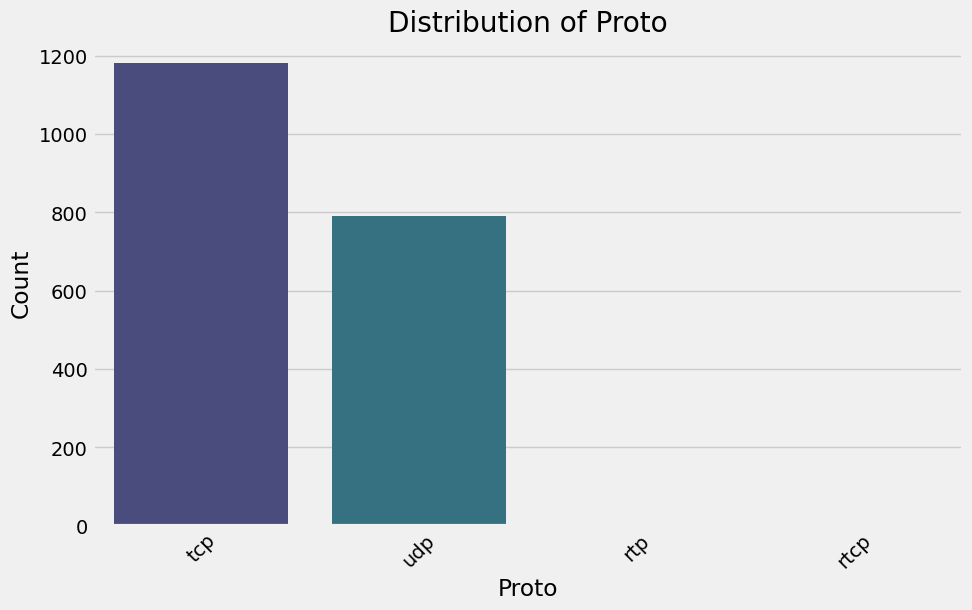

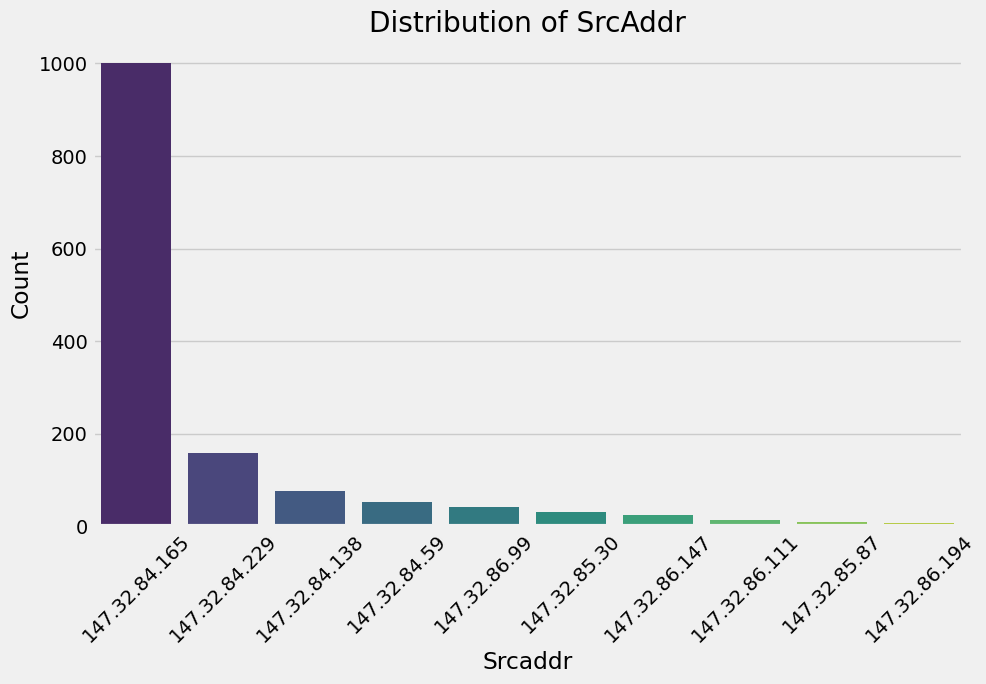

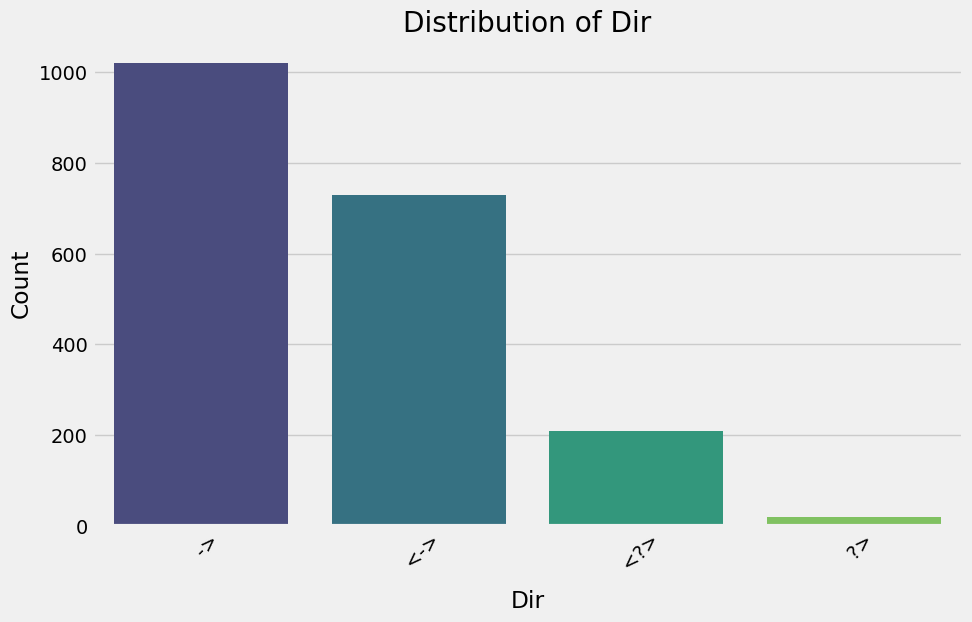

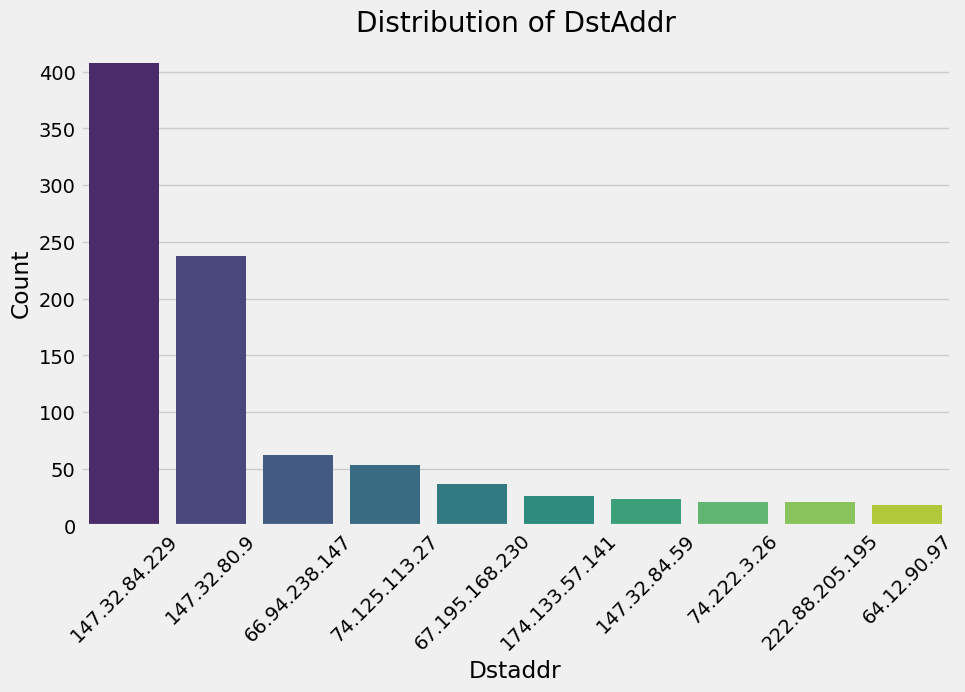

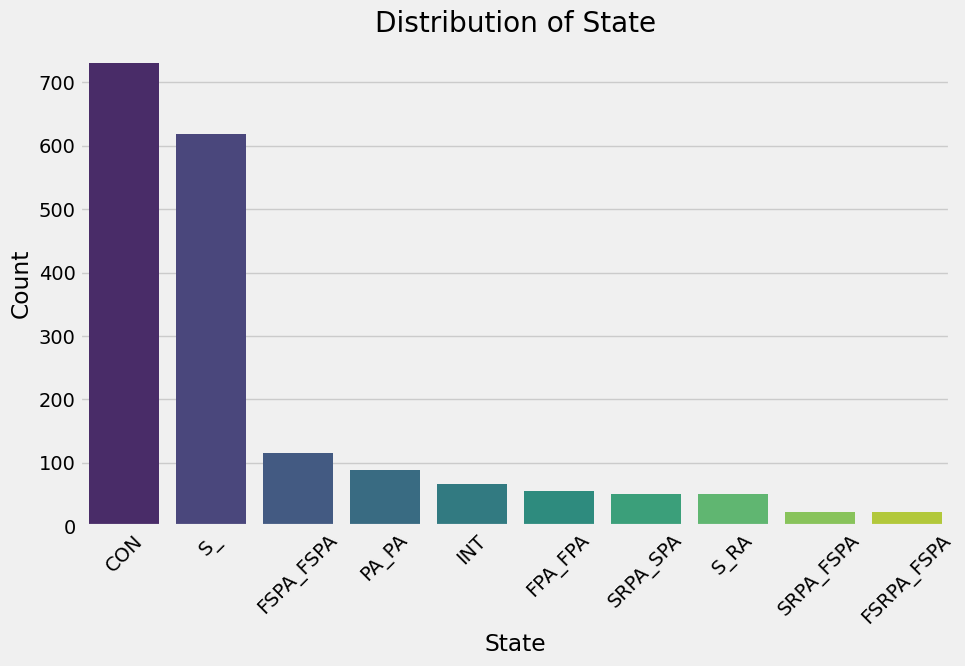

In [108]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']

# Plotting each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().head(10).index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print('\n\n')

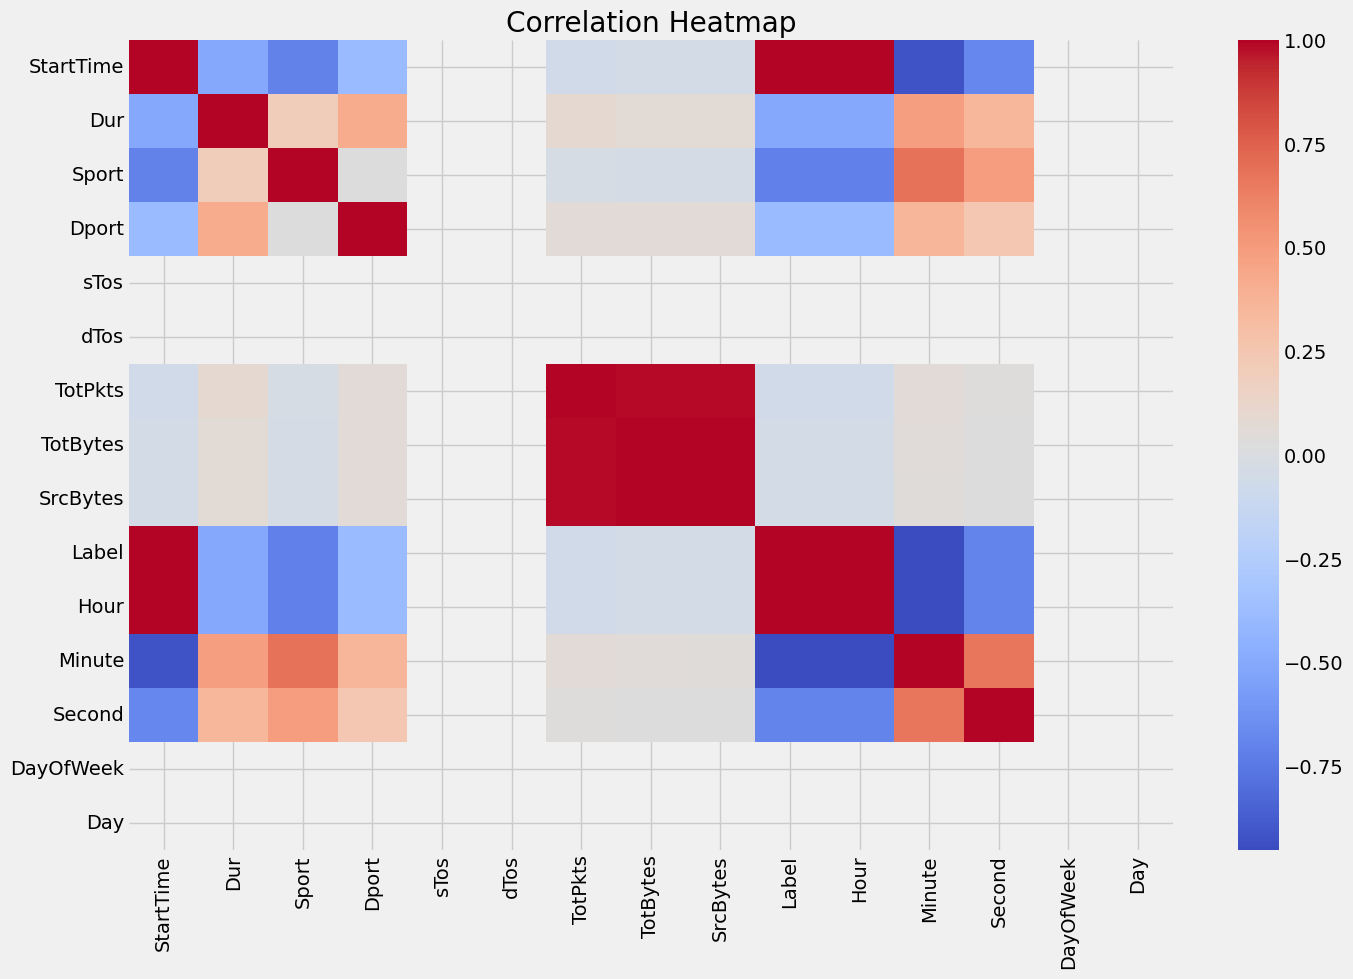

In [109]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [110]:
data[numerical_columns].corr()['Dur'].sort_values(ascending=False)

,Dur
Dur,1.000000
Minute,0.483567
Dport,0.420100
Second,0.352530
Sport,0.193129
TotPkts,0.086390
TotBytes,0.067320
SrcBytes,0.064389
StartTime,-0.507546
Hour,-0.509439


In [111]:
data[numerical_columns].corr()

,StartTime,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second,DayOfWeek,Day
StartTime,1.000000,-0.507546,-0.707276,-0.395293,NaN,NaN,-0.059833,-0.050050,-0.048149,0.995438,0.995438,-0.918372,-0.684269,NaN,NaN
Dur,-0.507546,1.000000,0.193129,0.420100,NaN,NaN,0.086390,0.067320,0.064389,-0.509439,-0.509439,0.483567,0.352530,NaN,NaN
Sport,-0.707276,0.193129,1.000000,0.025645,NaN,NaN,-0.022770,-0.029484,-0.031119,-0.711446,-0.711446,0.680123,0.496740,NaN,NaN
Dport,-0.395293,0.420100,0.025645,1.000000,NaN,NaN,0.058918,0.056742,0.057120,-0.393563,-0.393563,0.363714,0.252076,NaN,NaN
sTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotPkts,-0.059833,0.086390,-0.022770,0.058918,NaN,NaN,1.000000,0.988019,0.985888,-0.059983,-0.059983,0.056812,0.036743,NaN,NaN
TotBytes,-0.050050,0.067320,-0.029484,0.056742,NaN,NaN,0.988019,1.000000,0.999717,-0.050249,-0.050249,0.047822,0.031076,NaN,NaN
SrcBytes,-0.048149,0.064389,-0.031119,0.057120,NaN,NaN,0.985888,0.999717,1.000000,-0.048344,-0.048344,0.046027,0.029742,NaN,NaN
Label,0.995438,-0.509439,-0.711446,-0.393563,NaN,NaN,-0.059983,-0.050249,-0.048344,1.000000,1.000000,-0.951911,-0.692905,NaN,NaN


In [112]:
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
constant_columns

['sTos', 'dTos', 'DayOfWeek', 'Day']

In [113]:
data[constant_columns[0]].value_counts()

,count
sTos,
0.0,1978


In [114]:
data = data.drop(columns=constant_columns)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second
0,2011-08-10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,12,875,413,0,9,46,53
1,2011-08-10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,2,135,75,0,9,46,53
2,2011-08-10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,2,120,60,0,9,46,53
3,2011-08-10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,3,180,120,0,9,46,53
4,2011-08-10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,42,2856,1596,0,9,46,53


In [115]:
# Calculate the correlation matrix
corr_matrix = data[numerical_columns].corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
threshold = 0.8
high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
high_corr_features

['TotBytes', 'SrcBytes', 'Label', 'Hour', 'Minute']

In [116]:
high_corr_features.remove('Label')
high_corr_features

['TotBytes', 'SrcBytes', 'Hour', 'Minute']

In [117]:
data = data.drop(columns=high_corr_features)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,12,0,53
1,2011-08-10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,2,0,53
2,2011-08-10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,2,0,53
3,2011-08-10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,3,0,53
4,2011-08-10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,42,0,53


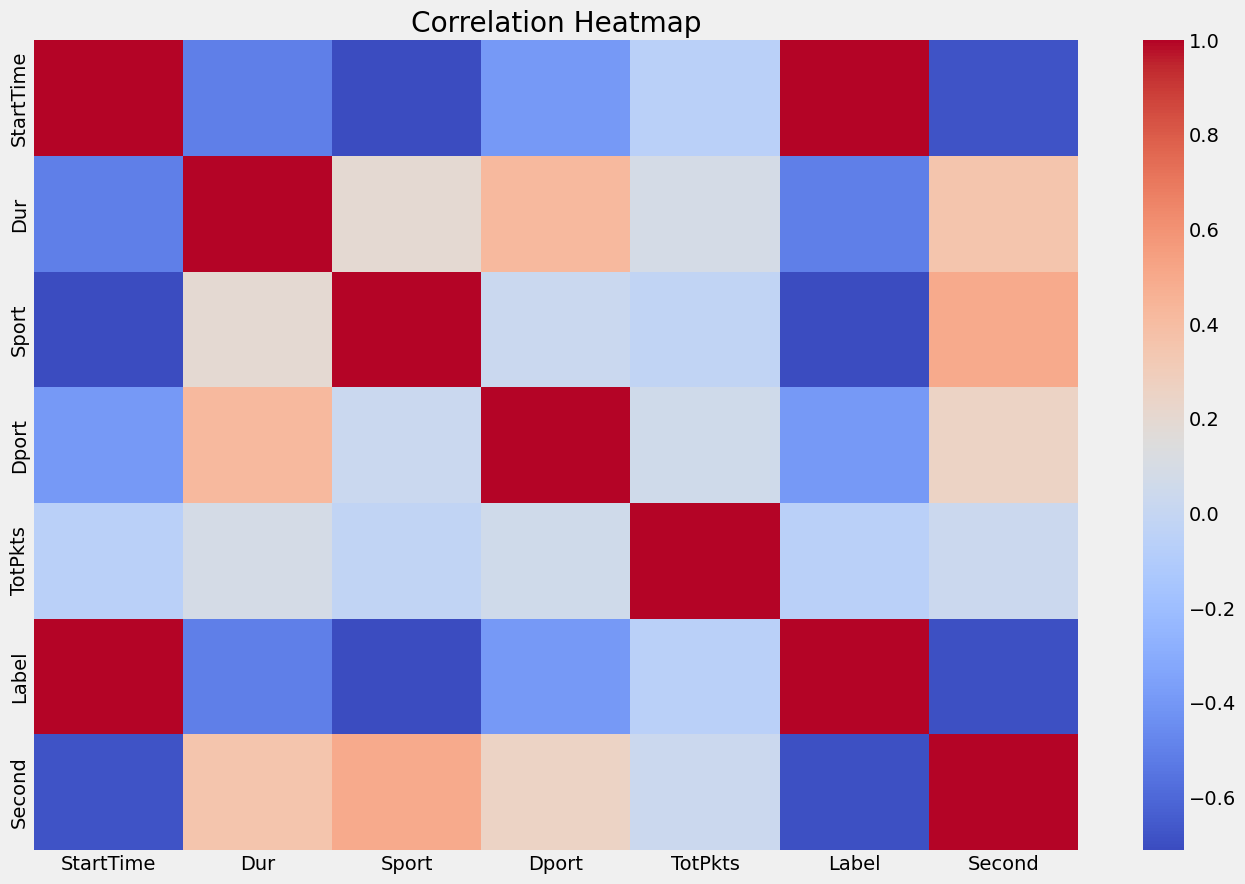

In [118]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [119]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,12,0,53
1,2011-08-10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,2,0,53
2,2011-08-10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,2,0,53
3,2011-08-10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,3,0,53
4,2011-08-10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,42,0,53


In [120]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'TotPkts', 'Label', 'Second'],
      dtype='object')

In [121]:
# Convert Source and Destination IP addresses to numerical values using hashing
data['SrcAddr'] = data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
data['DstAddr'] = data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
data['SrcAddr'] = data['SrcAddr'].fillna(-1).astype(int)
data['DstAddr'] = data['DstAddr'].fillna(-1).astype(int)

In [122]:
data.dtypes

,0
StartTime,datetime64[ns]
Dur,float64
Proto,object
SrcAddr,int64
Sport,int64
Dir,object
DstAddr,int64
Dport,int64
State,object
TotPkts,int64


In [123]:
data = data.drop(columns=['StartTime'])
data = data.drop(columns=['SrcAddr','Sport'])

In [124]:
X = data.drop(columns=['Label'])
y = data[['Label']]

In [125]:
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,3550.182373,udp,<->,15065,13363,CON,12,53
1,0.000883,udp,<->,15065,13363,CON,2,53
2,0.000326,tcp,<?>,45996,2063,FA_A,2,53
3,0.056966,tcp,<?>,3744,21857,FA_FA,3,53
4,3427.768066,udp,<->,15065,13363,CON,42,53


In [126]:
categorical_cols = ['Proto', 'State', 'Dir']

In [127]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
X[categorical_cols] = le.fit_transform(X[categorical_cols])
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,3550.182373,3.0,2.0,15065,13363,1.0,12,53
1,0.000883,3.0,2.0,15065,13363,1.0,2,53
2,0.000326,2.0,3.0,45996,2063,3.0,2,53
3,0.056966,2.0,3.0,3744,21857,4.0,3,53
4,3427.768066,3.0,2.0,15065,13363,1.0,42,53


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [129]:
X_train.shape,X_test.shape

((1582, 8), (396, 8))

In [130]:
y_train.shape,y_test.shape

((1582, 1), (396, 1))

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
X_train.shape,X_test.shape

((1582, 8), (396, 8))

In [133]:
label = y_test['Label'].unique().tolist()
label

[0, 1]

In [134]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 1.3324518203735352
Prediction time (sec) = 0.0006110668182373047

Training score = 0.907434462915601
Testing score = 0.934234693877551

No of misclassified for class 0 (test data) = 15
No of misclassified for class 1 (test data) = 11
Total no of misclassified points (test data) = 26
Total % of misclassified points (test data) = 0.06565656565656566

Training log_loss = 0.19360155536444767
Testing log_loss = 0.13736741603531527

Confusion matrix:


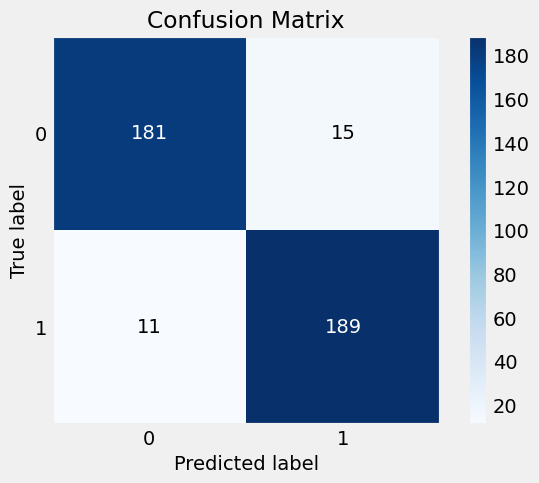

Classification report:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       196
           1       0.93      0.94      0.94       200

    accuracy                           0.93       396
   macro avg       0.93      0.93      0.93       396
weighted avg       0.93      0.93      0.93       396

**************************************************************************


In [135]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.005232572555541992
Prediction time (sec) = 0.0002751350402832031

Training score = 0.9074632352941177
Testing score = 0.9393367346938775

No of misclassified for class 0 (test data) = 13
No of misclassified for class 1 (test data) = 11
Total no of misclassified points (test data) = 24
Total % of misclassified points (test data) = 0.06060606060606061

Confusion matrix:


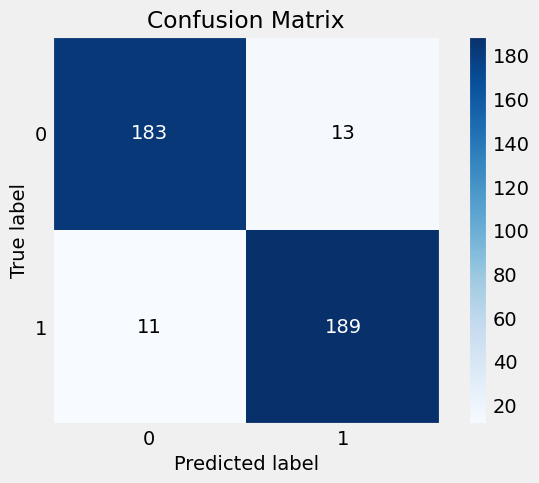

Classification report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       196
           1       0.94      0.94      0.94       200

    accuracy                           0.94       396
   macro avg       0.94      0.94      0.94       396
weighted avg       0.94      0.94      0.94       396

**************************************************************************


In [136]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.0061190128326416016
Prediction time (sec) = 0.0002288818359375

Training score = 0.999375
Testing score = 0.9898469387755102

No of misclassified for class 0 (test data) = 3
No of misclassified for class 1 (test data) = 1
Total no of misclassified points (test data) = 4
Total % of misclassified points (test data) = 0.010101010101010102

Training log_loss = 0.00087637410141739
Testing log_loss = 0.36407730696077956

Confusion matrix:


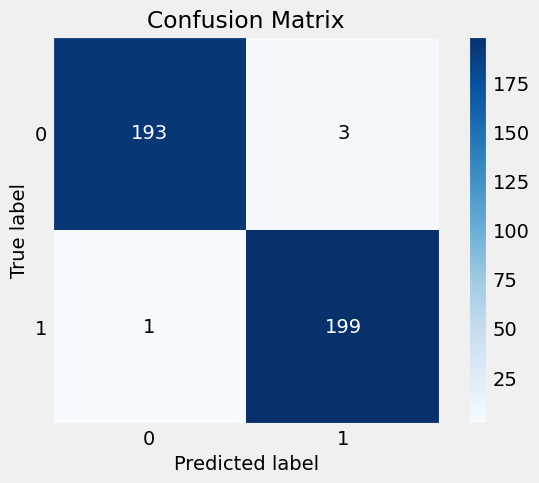

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       196
           1       0.99      0.99      0.99       200

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396

**************************************************************************


In [137]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.14694666862487793
Prediction time (sec) = 0.009988546371459961

Training score = 0.999375
Testing score = 0.9924489795918368

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 2
Total no of misclassified points (test data) = 3
Total % of misclassified points (test data) = 0.007575757575757576

Training log_loss = 0.00087637410141739
Testing log_loss = 0.020089270584552378

Confusion matrix:


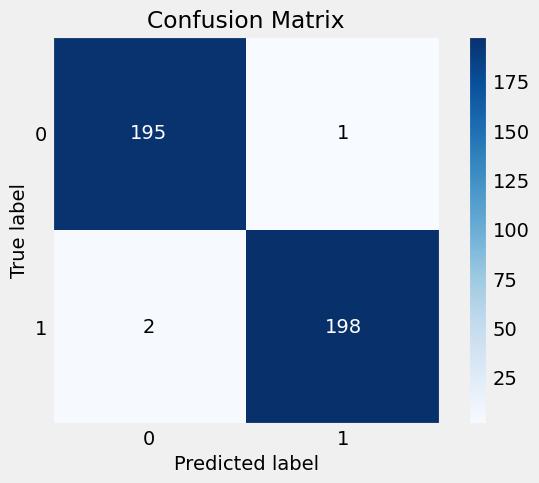

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       196
           1       0.99      0.99      0.99       200

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396

**************************************************************************


In [138]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.18811964988708496
Prediction time (sec) = 0.008425712585449219

Training score = 0.999375
Testing score = 0.9974489795918368

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 0
Total no of misclassified points (test data) = 1
Total % of misclassified points (test data) = 0.0025252525252525255

Training log_loss = 0.012627278808023817
Testing log_loss = 0.01844112288000857

Confusion matrix:


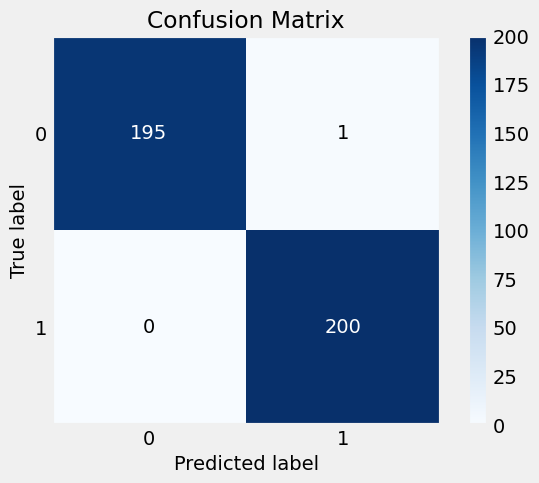

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       196
           1       1.00      1.00      1.00       200

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

**************************************************************************


In [139]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [140]:
# Set up directories for TensorBoard logs and model checkpoints
import os
from datetime import datetime
import tensorflow as tf

# Directory for TensorBoard logs
log_dir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))

# Directory to save the best model
checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Convert y_train and y_test to numpy arrays
y_train = y_train.values
y_test = y_test.values

# One-hot encode the labels if not already
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [141]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

# Define the input shape based on X_train
input_shape = X_train.shape[1]

# Functional API to define the model
inputs = Input(shape=(input_shape,))
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(2, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,722 (10.63 KB)

 Trainable params: 2,722 (10.63 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
# Define callbacks
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'best_model.keras'),
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [143]:
# Start timer for training
start_train_time = time.time()
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, tensorboard_callback]
)
# End timer for training
end_train_time = time.time()
train_time = end_train_time - start_train_time

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6515 - loss: 0.6192 - precision_1: 0.6515 - recall_1: 0.6515
Epoch 1: val_loss improved from inf to 0.34089, saving model to checkpoints/best_model.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.6539 - loss: 0.6169 - precision_1: 0.6539 - recall_1: 0.6539 - val_accuracy: 0.8864 - val_loss: 0.3409 - val_precision_1: 0.8864 - val_recall_1: 0.8864
Epoch 2/50
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8514 - loss: 0.3686 - precision_1: 0.8514 - recall_1: 0.8514
Epoch 2: val_loss improved from 0.34089 to 0.24110, saving model to checkpoints/best_model.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8532 - loss: 0.3650 - precision_1: 0.8532 - recall_1: 0.8532 - val_accuracy: 0.9022 - val_loss: 0.2411 - val_precision_1: 0.9022 - val_recall_1: 0.9022
Epoch 3/50
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8838 - loss: 0.2746 - precision_1: 0.8838 - recall_1: 0.8838
Epoch 3: val_loss impro

In [144]:
model = tf.keras.models.load_model('checkpoints/best_model.keras')

In [145]:
y_pred_train = model.predict(X_train)

start_train_time = time.time()
y_pred_test = model.predict(X_test)
end_train_time = time.time()
test_time = end_train_time - start_train_time

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [146]:
y_pred_prob_train = np.max(y_pred_train,axis=1)
y_pred_train = np.argmax(y_pred_train,axis=1)

y_pred_prob_test = np.max(y_pred_test,axis=1)
y_pred_test = np.argmax(y_pred_test,axis=1)

y_train = np.argmax(y_train,axis=1)
y_test = np.argmax(y_test,axis=1)


Training score = 0.9477078005115089
Testing score = 0.9620918367346938

No of misclassified for class 0 (test data) = 8
No of misclassified for class 1 (test data) = 7
Total no of misclassified points (test data) = 15
Total % of misclassified points (test data) = 0.03787878787878788

Training log_loss = 3.479294257514498
Testing log_loss = 3.5717592130350346

Confusion matrix:


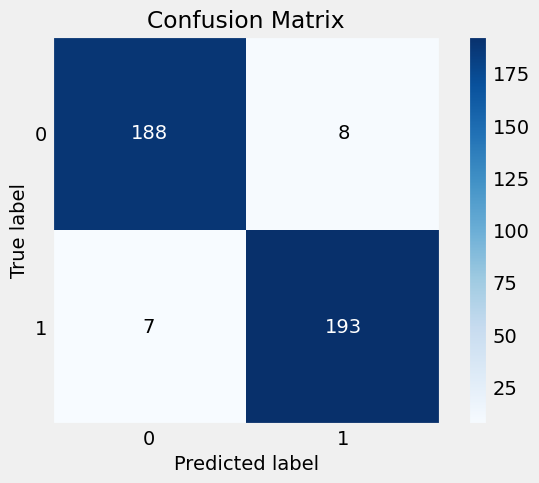

Classification report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       196
           1       0.96      0.96      0.96       200

    accuracy                           0.96       396
   macro avg       0.96      0.96      0.96       396
weighted avg       0.96      0.96      0.96       396

**************************************************************************


In [147]:
confusion_mat = confusion_matrix(y_test, y_pred_test)
misclassified = np.sum(y_pred_test != y_test)
acc_train = balanced_accuracy_score(y_train, y_pred_train)
acc_test = balanced_accuracy_score(y_test, y_pred_test)

loss_train = log_loss(y_train, y_pred_prob_train)
loss_test = log_loss(y_test, y_pred_prob_test)

print(f'\nTraining score = {acc_train}')
print(f'Testing score = {acc_test}\n')

for i, class_label in enumerate(label):
    err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
    print(f'No of misclassified for class {class_label} (test data) = {err}')

print(f'Total no of misclassified points (test data) = {misclassified}')
print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

if loss_train is not None and loss_test is not None:
    print(f'Training log_loss = {loss_train}')
    print(f'Testing log_loss = {loss_test}\n')

print('Confusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
plt.show()

print('Classification report:\n')
print(classification_report(y_test, y_pred_test))
print('**************************************************************************')

In [148]:
ANN_results = [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

In [149]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results,ANN_results]
s2=['LR','LSVC','DTC','ETC','RFC','ANN']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.907434,0.934235,26,0.065657,0.193602,0.137367,1.332452,0.000611
1,LSVC,0.907463,0.939337,24,0.060606,NaN,NaN,0.005233,0.000275
2,DTC,0.999375,0.989847,4,0.010101,0.000876,0.364077,0.006119,0.000229
3,ETC,0.999375,0.992449,3,0.007576,0.000876,0.020089,0.146947,0.009989
4,RFC,0.999375,0.997449,1,0.002525,0.012627,0.018441,0.188120,0.008426
5,ANN,0.947708,0.962092,15,0.037879,3.479294,3.571759,21.013254,0.526884


In [150]:
scaler

StandardScaler()

In [151]:
rfc

RandomForestClassifier(class_weight='balanced')

In [152]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(scaler, rfc)
joblib.dump(pipeline, 'rfc_pipeline.joblib')

['rfc_pipeline.joblib']

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
!cp -r /content/drive/MyDrive/save_data/synthetic_X.npy /content/.
!cp -r /content/drive/MyDrive/save_data/synthetic_y.npy /content/.

In [155]:
synthetic_X = np.load('synthetic_X.npy')
synthetic_y = np.load('synthetic_y.npy')

Prediction time (sec) = 0.014253616333007812
Testing score = 0.9568762781186094

No of misclassified for class 0 (test data) = 11
No of misclassified for class 1 (test data) = 75
Total no of misclassified points (test data) = 86
Total % of misclassified points (test data) = 0.043478260869565216

Testing log_loss = 0.12026575279603653

Confusion matrix:


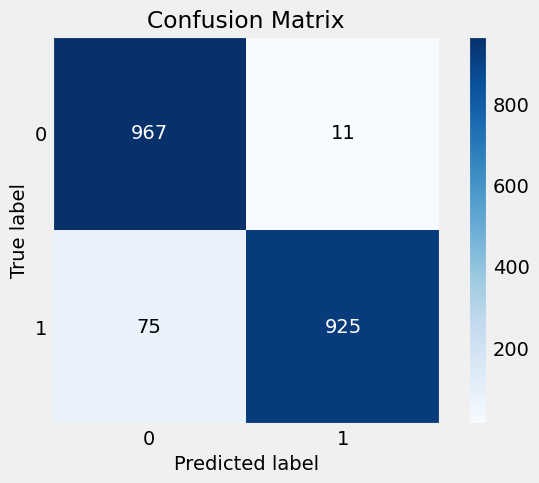

Classification report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       978
           1       0.99      0.93      0.96      1000

    accuracy                           0.96      1978
   macro avg       0.96      0.96      0.96      1978
weighted avg       0.96      0.96      0.96      1978

**************************************************************************


In [156]:
model = rfc

start_time = time.time()
y_pred_test = model.predict(synthetic_X)
test_time = time.time() - start_time
print(f'Prediction time (sec) = {test_time}')

y_pred_prob_test = model.predict_proba(synthetic_X) if hasattr(model, 'predict_proba') else None

confusion_mat = confusion_matrix(synthetic_y, y_pred_test)
misclassified = np.sum(y_pred_test != synthetic_y.ravel())
acc_test = balanced_accuracy_score(synthetic_y, y_pred_test)

loss_test = log_loss(synthetic_y, y_pred_prob_test)

print(f'Testing score = {acc_test}\n')

for i, class_label in enumerate(label):
    err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
    print(f'No of misclassified for class {class_label} (test data) = {err}')

print(f'Total no of misclassified points (test data) = {misclassified}')
print(f'Total % of misclassified points (test data) = {misclassified / len(synthetic_y)}\n')

if loss_train is not None and loss_test is not None:
    print(f'Testing log_loss = {loss_test}\n')

print('Confusion matrix:')
skplt.metrics.plot_confusion_matrix(synthetic_y, y_pred_test)
plt.show()

print('Classification report:\n')
print(classification_report(synthetic_y, y_pred_test))
print('**************************************************************************')

In [157]:
# Assuming rf_model is your trained Random Forest model
importances = etc.feature_importances_

# Assuming your feature names are stored in a list `feature_names`
feature_names = X.columns  # Or a list of feature names if you have them separately

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
7,Second,0.254938
5,State,0.202473
2,Dir,0.165651
0,Dur,0.134161
4,Dport,0.077793
3,DstAddr,0.072515
1,Proto,0.062356
6,TotPkts,0.030113


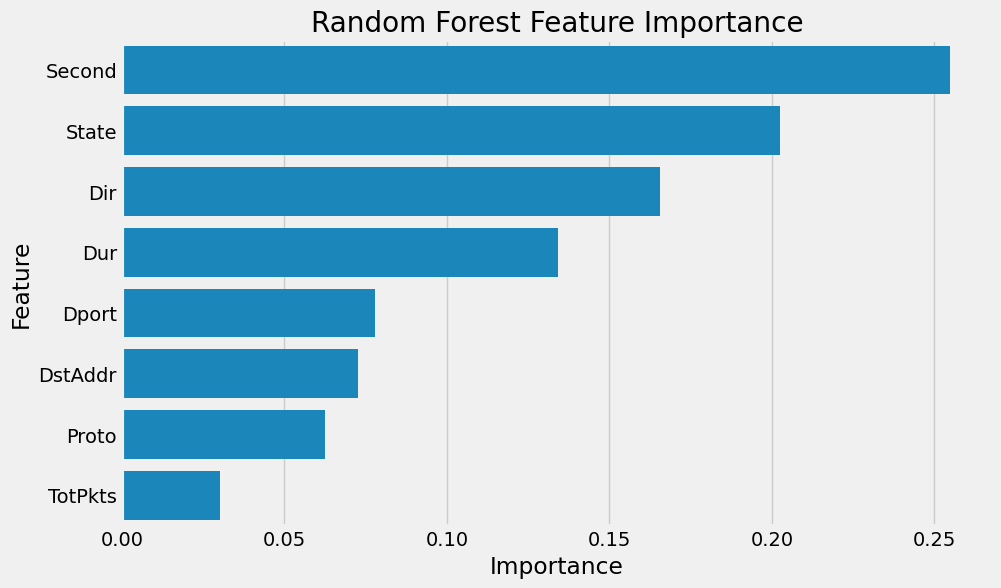

In [158]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

In [159]:
from sklearn.feature_selection import RFE

selector = RFE(etc, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

In [160]:
# Create a DataFrame for better visualization
feature_importance2_df = pd.DataFrame({
    'Feature': feature_names,
    'support': selector.support_,
    'ranking':selector.ranking_
})

feature_importance2_df = feature_importance2_df.sort_values(by='ranking')
feature_importance2_df

,Feature,support,ranking
0,Dur,True,1
2,Dir,True,1
5,State,True,1
4,Dport,True,1
7,Second,True,1
3,DstAddr,False,2
1,Proto,False,3
6,TotPkts,False,4
